# Symbolic Computing with SymPy

In [1]:
import sympy
sympy.init_printing()

# sympy está dando um aviso de código depreciado. Para fins de aprendizagem, estas linhas abaixo omitem os erros.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
sympy.pi ** 2

In [3]:
# Creating symbols
x = sympy.Symbol("x")

In [4]:
x

In [5]:
x * 2

In [6]:
# Creating symbols with specified types
y = sympy.Symbol("y", real=True)

In [7]:
(x.is_real, y.is_real)

(None, True)

In [8]:
y.is_imaginary

False

### Symbol attributes can influence the symbolic representation
If a certain attribute is giving to a symbol, some representations might or might not be possible. Check the example below:

In [9]:
y = sympy.Symbol("y")
z = sympy.Symbol("z", positive=True)

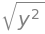

In [10]:
sympy.sqrt(y ** 2)

In [11]:
sympy.sqrt(z ** 2)

Since y is not set as positive nor real or complex, that is, it can be negative and not complex, sympy is unable to reduce the square root. The opposite is true for z, since it is a positive value and, therefore, can be simplified. Other specifications can also be made, like asserting the symbol is even or odd.

In [12]:
n1 = sympy.Symbol("n")
n2 = sympy.Symbol("n", integer=True)
n3 = sympy.Symbol("n", odd=True)

In [13]:
sympy.cos(n1 * sympy.pi)

In [14]:
sympy.cos(n2 * sympy.pi)

In [15]:
sympy.cos(n3 * sympy.pi)

In [16]:
a, b, c = sympy.symbols("a, b, c", negative=True)
d, e, f = sympy.symbols("d, e, f", positive=True)

In [17]:
(a + b).is_positive

False

In [18]:
(d + e).is_positive

True

### Integer and floating representations
To be compatible with the other symbols, sharing the same methods and attributes, sympy has a class for integers and float numbers. sympy.Integer and sympy.Float are the name of these classes. It is also possible to use the method sympify:

In [19]:
i = sympy.Integer(10)

In [20]:
j = sympy.Float(10.3)

In [21]:
((i + j).is_real, (i + j).is_imaginary)

(True, False)

In [22]:
k = sympy.sympify(32)

In [23]:
k

In [24]:
f * (k * b / (e + a)) ** c

In [25]:
sympy.factorial(100)

### Float and float precision
Sympy will treat floats with an arbitrary number of decimals. If it is converted from python float number, however, it will have a precision error due to the limitations of float numbers. Instead, if the symbol is created with an exact string representation of that number, it will be exact:

In [26]:
sympy.Float(0.3, 25) # Creates a symbolic representation of the python's float 0.3 (with its rounding errors), with 25 decimals

In [27]:
sympy.Float("0.3", 25)# Instead of creating from python's 0.3 float number, it cast the string as an exact value

### Sympy Rational numbers and simplification

In [28]:
sympy.Rational(3, 7)

In [29]:
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)

In [30]:
r1 + r2

In [31]:
r1 * r2

In [32]:
r1 / r2

In [33]:
r1 / sympy.oo * r2

### Function representations
Mathematical functions can be represented in sympy. These can be defined, with specific expressions defined in the function, or undefined, which can accent an arbitrary number of arguments and it will not be evaluated as an expression.

In [34]:
x, y, z = sympy.symbols("x, y, z")

In [35]:
f = sympy.Function("f")

In [36]:
type(f)

sympy.core.function.UndefinedFunction

In [37]:
f(x)

In [38]:
g = sympy.Function("g")(x, y, z)

In [39]:
g

In [40]:
g * f(x)

In [41]:
g.free_symbols

#### sympy.functions.elementary:

In [42]:
sympy.sin(x)

In [43]:
sympy.sin(sympy.pi * 2.5)

In [44]:
n = sympy.Symbol("n", integer=True)
m = sympy.Symbol("n", real=True)

In [45]:
sympy.sin(sympy.pi * n)

In [46]:
sympy.sin(sympy.pi * m)

**Sympy Lambda Functions:**

In [47]:
f = sympy.Lambda(x, x ** 2)

In [48]:
f(5)

In [49]:
f(x+y)

In [50]:
f

In [51]:
f(f(f(x-y)-y)-y)

### Expressions

In [52]:
x = sympy.Symbol("x")

In [53]:
expr = 1 + 3 * x ** 2 + 8 * x ** 3

In [54]:
expr

In [55]:
expr.args

In [56]:
expr2 = (x+2) ** 2

In [57]:
e = sympy.expand(expr2)

In [58]:
# Expression simplification -- not workling here, but you get it...
sympy.simplify(e)

In [59]:
# Expression expansion

In [60]:
expr = (x + 1) * (x + 2)

In [61]:
expr

In [62]:
expr.expand()

In [63]:
sympy.sin(x + y).expand(trig=True) # The argument trig=True will tell sympy to expand over trigonometric rules

In [64]:
sympy.log(a * b).expand(log=True) # The same as above, but using log properties

In [65]:
sympy.exp(sympy.I * a + b).expand(complex=True) # for complex expressions

In [66]:
sympy.exp((a - b) * x).expand(power_exp=True) # for power expansions

**Factor, collect and combine**

In [67]:
sympy.factor(x ** 2 - 1)

In [68]:
expr3 = x * sympy.cos(y) + sympy.sin(z) * x

In [70]:
expr3

In [71]:
sympy.factor(expr3)

In [76]:
a, b = sympy.symbols("a, b", positive=True)

In [77]:
expr4 = (sympy.log(a) - sympy.log(b))

In [78]:
expr4

In [80]:
sympy.logcombine(expr4) # using logcombine to combine using the properties of logs

In [82]:
expr5 = x + y + x * y * z

In [83]:
expr5

In [85]:
sympy.factor(expr5) # sympy can't factor it, because not all elements have an x

In [87]:
expr5.collect(y) # but it can collect and simplify the elements that have it

In [88]:
expr5.collect(x) # The syntax is expression.collect(item_to_collect)

In [95]:
for el in expr5.free_symbols:
    print(f"{el} ->", expr5.collect(el))

z -> x*y*z + x + y
x -> x*(y*z + 1) + y
y -> x + y*(x*z + 1)


Since collect returns a new expression, multiple collection calls can be chained together.

In [96]:
expr6 = sympy.cos(x+y) + sympy.sin(x-y)

In [102]:
expr6

In [103]:
expr6.expand(trig=True)

In [104]:
expr6.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)])

In [105]:
expr6.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)]).collect(sympy.cos(y)-sympy.sin(y))

### Apart, Together and Cancel
Another possible manipulation is to rewrite fractions.

In [110]:
expr = 1/(x**2+3*x+2)

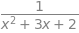

In [111]:
expr

In [112]:
sympy.apart(expr, x)

In [113]:
expr2 = 1 / (y * x + y) + 1 / (1 + x) 

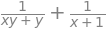

In [114]:
expr2

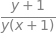

In [115]:
sympy.together(expr2)

In [116]:
expr3 = y / (y * x + y)

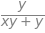

In [117]:
expr3

In [118]:
sympy.cancel(expr3)

## Continue at page 116